In [59]:
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
train_df = pd.read_csv(os.path.join('.','data','features.csv'))
test_df = pd.read_csv(os.path.join('.','data','features_test.csv'))
test_df.head()


,Unnamed: 0,id,inc_angle,min1,max1,std1,med1,mean1,laplace1,sobel0_1,...,min2,max2,std2,med2,mean2,laplace2,sobel0_2,sobel1_2,kurtosis2,skewness2
0,0,5941774d,34.966400,-26.700575,7.286025,2.589150,-15.948751,-16.011443,27.885822,97.584145,...,-34.363483,-16.214458,2.135156,-24.127529,-24.284114,32.096066,84.983330,74.754135,0.346977,-0.241005
1,1,4023181e,32.615072,-34.176785,-10.549344,2.516025,-25.176090,-25.303186,67.280533,76.285103,...,-38.101250,-10.759922,2.453086,-25.176981,-25.330729,63.927227,72.741241,69.054535,1.382153,0.004502
2,2,b20200e4,37.505433,-34.069744,18.968086,6.453403,-17.811716,-19.076990,89.613892,248.927185,...,-37.592476,19.064425,6.519116,-17.697927,-19.006052,89.723900,254.423904,141.921707,0.798191,0.475117
3,3,e7f018bb,34.473900,-27.293751,1.695177,2.811434,-14.409250,-14.290480,34.550190,86.915764,...,-35.094147,-6.583812,2.661883,-23.880453,-23.870259,42.459339,91.723419,86.588615,4.292889,0.771209
4,4,4371c8c3,43.918874,-33.386978,-8.122338,2.380582,-23.605141,-23.662115,77.789665,67.644096,...,-35.886692,-8.778152,2.247920,-23.375420,-23.549102,69.769234,53.953899,71.720718,2.594074,0.052419


In [15]:
train_df.head()

,Unnamed: 0,is_iceberg,not_iceberg,id,inc_angle,min1,max1,std1,med1,mean1,...,min2,max2,std2,med2,mean2,laplace2,sobel0_2,sobel1_2,kurtosis2,skewness2
0,0,0,1,dfd5f913,43.9239,-38.211376,-0.213149,2.764537,-27.879921,-27.911043,...,-41.135918,-11.252153,2.381284,-30.007847,-29.910117,37.488644,98.892159,89.720650,5.305907,0.465707
1,1,0,1,e25388fd,38.1562,-23.125309,12.570409,3.142532,-13.654199,-13.566554,...,-34.765831,0.044052,2.934098,-25.486130,-25.359106,28.627317,115.417503,97.524902,15.128946,2.331271
2,2,1,0,58b2aaa0,45.2859,-33.391197,-9.918477,2.223905,-22.935019,-23.053698,...,-34.148819,-15.605879,2.125275,-24.606205,-24.839821,35.274166,88.973747,73.045944,0.508406,-0.404553
3,3,0,1,4cfc3a18,43.8306,-32.204136,4.795627,2.566233,-23.303238,-23.210771,...,-39.564053,-5.554516,2.389980,-29.549923,-29.567913,35.258183,103.988777,83.689163,12.356155,1.089592
4,4,0,1,271f93f4,35.6256,-35.010487,-6.956036,2.305288,-25.206615,-25.280029,...,-40.276115,-9.434006,2.276244,-25.466921,-25.627726,39.314606,96.585213,77.325691,3.096365,-0.056035


In [217]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_df = train_df.drop(['Unnamed: 0','id','is_iceberg','not_iceberg'], axis=1)
Y_df = train_df['is_iceberg']

X_test = test_df.drop(['Unnamed: 0','id'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_df)
X = X_df.as_matrix()
#X = scaler.transform(X_df)
X_test = scaler.transform(X_test)

X_train, X_valid, Y_train, Y_valid = train_test_split(X , Y, test_size=0.2, random_state=42, stratify=Y_df)





In [218]:
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_valid)
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_valid)

0.66978193146417442

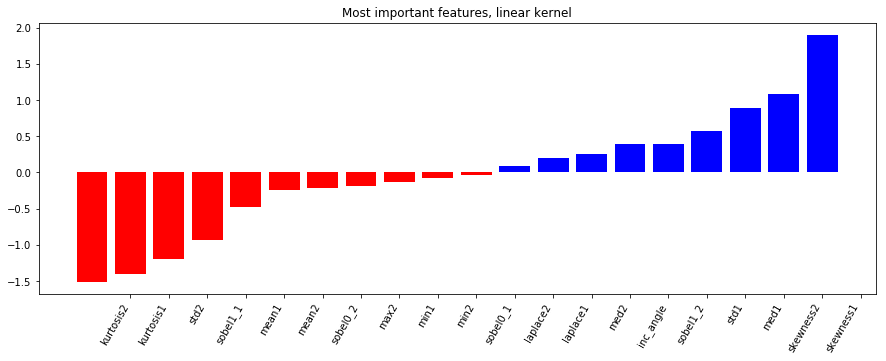

0.86970074812967579

In [190]:
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.title('Most important features, linear kernel')
 plt.show()

from sklearn.svm import LinearSVC
svc = LinearSVC().fit(X, Y_df)
plot_coefficients(svc, X_df.columns.values.tolist())
Y_pred = svc.predict(X)
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_df)

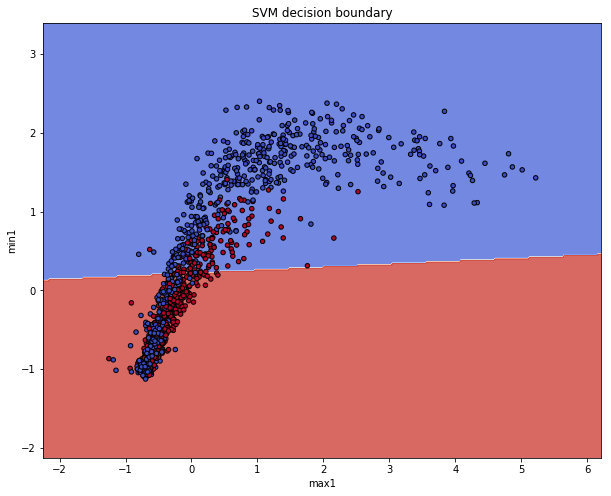

0.645261845387


In [182]:
X_2d = X_df[['std2','skewness2']].as_matrix()
from sklearn.preprocessing import StandardScaler
X_2d = StandardScaler().fit_transform(X_2d)
svc = svm.SVC(kernel='linear').fit(X_2d, y=Y_df)

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
plt.figure(figsize=(10,8))
ax = plt.gca()
X0, X1 = X_2d[:, 0], X_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svc, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_df, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.xlabel('max1')
plt.ylabel('min1')
plt.title('SVM decision boundary')

plt.show()

Y_pred = svc.predict(X_2d)
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_pred,Y_df))
#print(svc.coef_)

0.84735202492211836

In [ ]:
Y_pred = clf.predict_proba(X_test)
print(Y_pred)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_valid)

ValueError: Found input variables with inconsistent numbers of samples: [8424, 1604]

In [42]:
submit_df = pd.DataFrame({'id': test_df["id"], 'is_iceberg': Y_pred[:,1]})
submit_df.head()
submit_df.to_csv("./submission.csv", index=False)


In [43]:
submit_df.head()

,id,is_iceberg
0,5941774d,0.075102
1,4023181e,0.086224
2,b20200e4,0.029365
3,e7f018bb,0.945732
4,4371c8c3,0.037757
